<a href="https://colab.research.google.com/github/cortes28/LinearRegression_PyTorch/blob/main/01_pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch workflow

Now to explore how to work with PyTorch with the end-to-end workflow with creating a Linear Regression Model

Following the video: https://youtu.be/V_xro1bcAuA for learning PyTorch


In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representations.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# Cretae *known* parameters
import torch
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds an extra dimension
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.



In [4]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, visualize!

In [6]:
import matplotlib.pyplot as plt

def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=None):
  """
  Plot training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue          c means color->'b' blue, s means size
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")


  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})


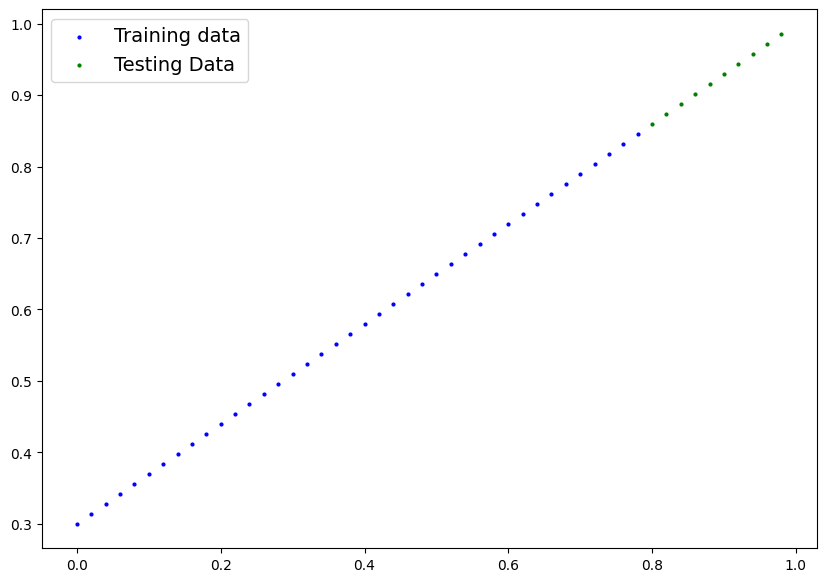

In [7]:
plot_pred()

## 2. Build Model

Our first PyTorch model!

This very exciting...let's do it!


Waht our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms
1. Gradient descent
2. Backpropagation

In [8]:
"""
My own debugging, it seems that variables within classes for LinearRegressionModel are sensitive ->
had self.weight before but it crashed and it needed it as self.weights  (missing 's' in weight(s))
"""

# Create a linear regression model class
import torch
from torch import nn
## nn.module <- almost everything in PyTorch inherits from nn.Module (as lego buildin bricks of PyTorch)
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,                 # <- start with a random weight adn try to adjust it to the ideal weight
                                          requires_grad=True, # <- can this paramter be updated via gradient  descent?
                                          dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1,                    # <- start with a random bias and try to adjust it to the ideal bias
                                       requires_grad=True,    # <- can this paramter be updated via gradient descent?
                                       dtype=torch.float))    # <- PyTorch loves the datatype torch.float32
  # Forward method to define the computation in the model:
  def forward(self, x:torch.Tensor)->torch.Tensor:          # <- "x" is the input data
    return self.weights * x + self.bias                     # this is the self regression Model

## PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs (a neural network could be considered this)
* torch.nn.Parameter - what paramters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural networks, if you subclass it, you should overwrite forward()
* torch.optim - this is where optimizers in PyTorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside

So we can check our model's parameters or what's inside our model using .parameters().

In [9]:
# Create a random seed.
torch.manual_seed(42)

# Create an instance of the model (this is asubclass of nn.Module)
model_0 = LinearRegressionModel()

#Chec out the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to runi through the forward method.

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
### Making predictions with model:

with torch.inference_mode():
  y_preds= model_0(X_test)


# can also do with torch.no_grad() but inference_mode() preferred.

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

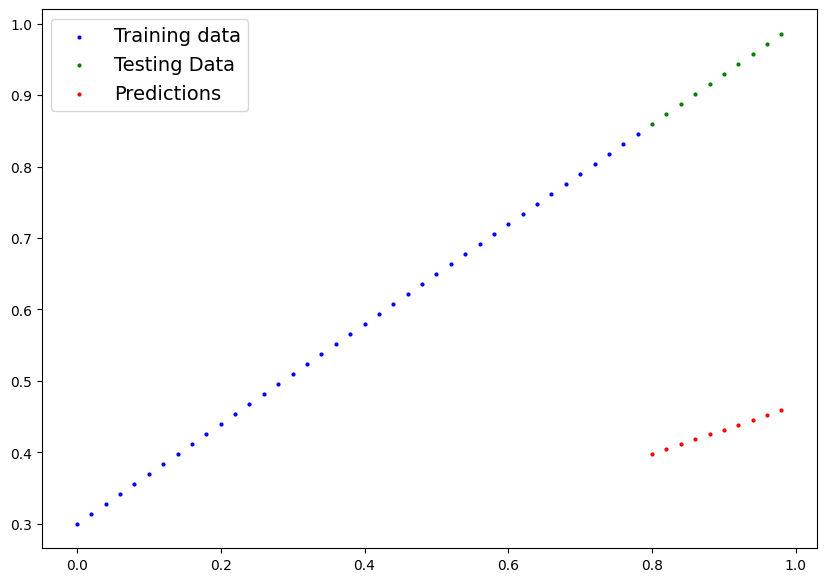

In [15]:
plot_pred(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to reer to it as a loss function.

Thins we need to train:

* **Loss function** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer** Takes into account the loss of a model and adjusts the model's paramters (e.g. weight & bias) to improve the loss function.

  - Inside the optimizer you'll often have to set two paramters:
      - `params` - the model parameters you'd like to optimizer for example `params = model_0.parameters()
      - `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
- A training loop
- A nesting loop


In [16]:
model_0.parameters()

<generator object Module.parameters at 0x7f3a17091540>

In [17]:
# Check out our model's paramters (a paramter is a value that is the model sets itselfs)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()   # Measures how wrong our model is

# Set up optimizer (stochastic gradient descent)
# Adjusts the paramters to lower the loss from the loss function
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [19]:
loss_fn

L1Loss()

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) - to make predictions on data also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the paramters of our models with respect to the loss (**backpropagation)
5. Optimizer step - use the optimzer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

In [20]:
model_0.parameters()

<generator object Module.parameters at 0x7f3ae5dc9540>

In [21]:
torch.manual_seed(42)

# an epoch is one loop through the data...(this is a hyperparameter because we've set it ourselves)
epochs =200

# Lists that could help us keep the track of training the model and its metrics
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model in training mode
  model_0.train()   # train mode in PyTorch sets all parameters that require gradients to require gradients


  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss (inside loss_fn the first parameter is the input [the model output from the training process], second is the target output that we want)
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimzer (perform gardient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval()    # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode(): # Turns off gradient tracking & a coupl emore things behind the scenes
  # may also see with torch.no_grad()
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2 calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # print out what's happening
    if epoch % 10 == 0:
      # keeping track of what is going on with our model (metrics)
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Loss: {loss}: | Test Loss: {test_loss}")
      # print out model state_dict()
      print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534: | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637: | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134: | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906: | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802: | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876: | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351: | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

In [22]:
weight, bias

(0.7, 0.3)

In [23]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [24]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

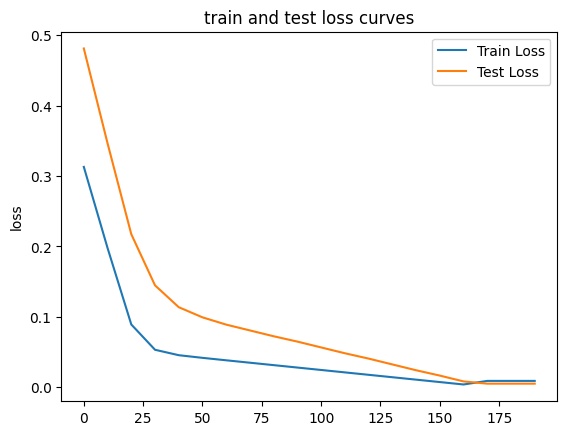

In [25]:
# Plot the loss curves
# loss values individually are from PyTorch, cannot plot them so we must convert to numpy array as matplotlib works with numpy
# also it may be as np.array(torch.tensor(loss_values).cpu().numpy()) with 'cpu()' if by chance we are working with tensors on the GPU
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("train and test loss curves")
plt.ylabel("loss")
plt.legend();

In [26]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

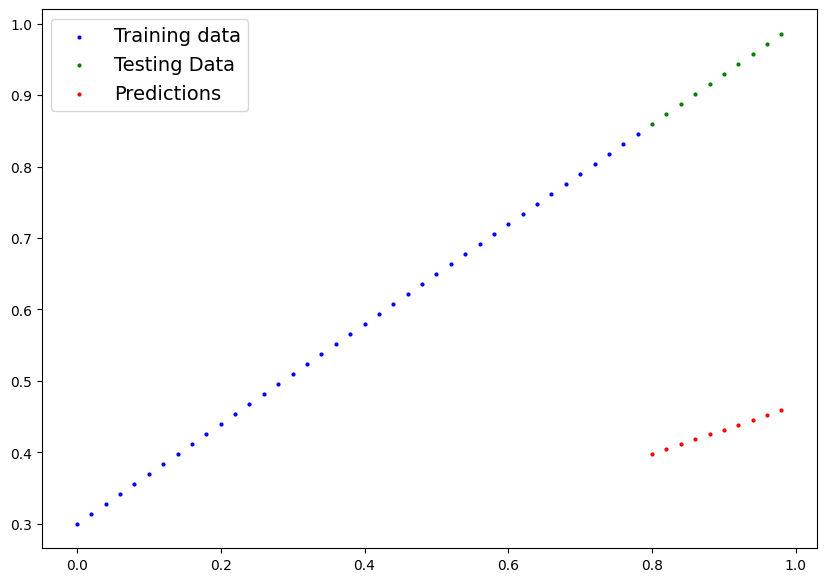

In [28]:
plot_pred(predictions = y_preds)

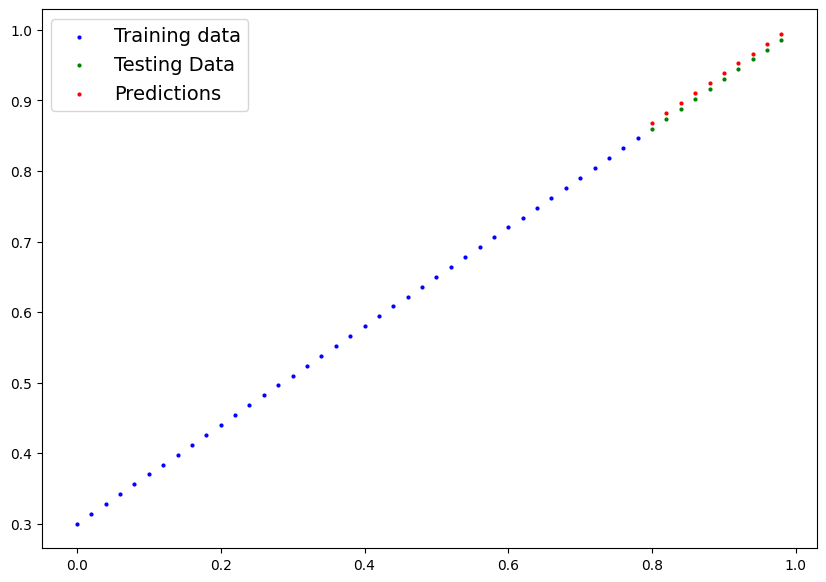

In [29]:
plot_pred(predictions = y_preds_new)

In [30]:
### After running through some epochs (plus 100)
with torch.inference_mode():
  y_preds_new_100 = model_0(X_test)

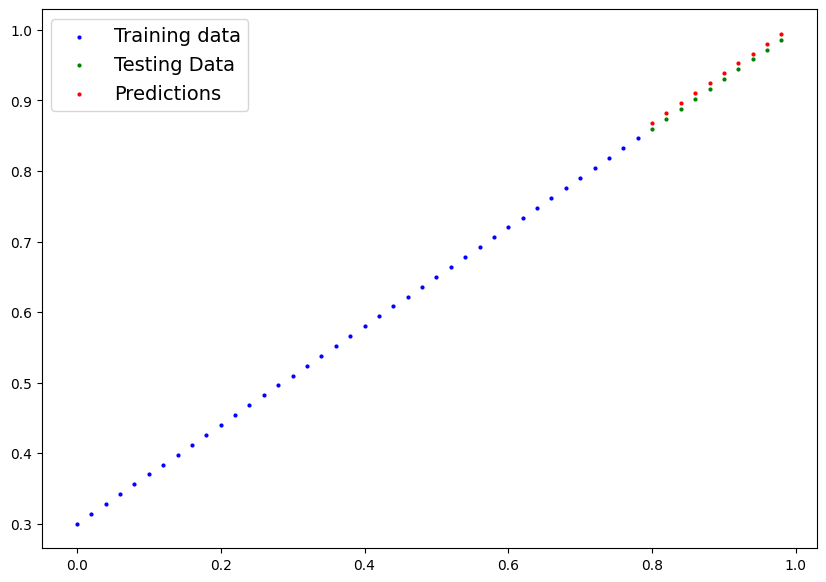

In [31]:
plot_pred(predictions = y_preds_new_100)

## Saving a model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [32]:
# Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. save the model state dict rather than saving the entire model itself
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj =model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_model_0.pt


In [33]:
!ls -l models   # checking it within the directory

total 4
-rw-r--r-- 1 root root 1107 Jul  7 08:34 01_pytorch_model_0.pt


## Loading PyTorch Model

Since we saved our model's `state_dict()` over the entire model itself, we'll create a new instance of our model  class and laod the saved `state_dict()` into THAT object

In [34]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [36]:
# same parameter values
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [37]:
# Make some predictionswith our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)


loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [38]:
# Looking back at our original model and making predictions with that (unsaved model that is currently not stored)
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)


y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [39]:
# Check if they are the same
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Doing it all again

Let's go back through the steps above and see it all in one place.

In [40]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np


# Check ver PyTorch

torch.__version__


'2.0.1+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentionally faster computing).

If no GPU is available, the code will default using CPU.



In [41]:
# setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"The device that will be used is {device}")

The device that will be used is cuda


In [42]:
!nvidia-smi

Fri Jul  7 08:34:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 6.1 Data

In [44]:
# Create some data using the linear regression formula of y = weight + x * bias (linear regression or linear function)
weight = 0.3
bias = 0.5       # our own independent values

# Create range values
start = 0
end = 5
step = 0.05

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # the unsqueeze is needed to avoid dimension errors later on
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000],
         [0.2500],
         [0.3000],
         [0.3500],
         [0.4000],
         [0.4500]]),
 tensor([[0.5000],
         [0.5150],
         [0.5300],
         [0.5450],
         [0.5600],
         [0.5750],
         [0.5900],
         [0.6050],
         [0.6200],
         [0.6350]]))

In [49]:
# Split the data by parsing it
# train_split = int(0.8 * len(X))
# X_train, y_train = X[:train_split], y[:train_split]     # the first 80% of the data is for training
# X_test, y_test   = X[train_split:], y[train_split:]

# using sklearn, we can set the training/testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train[:10], y_train[:10]

(tensor([[2.7500],
         [4.4000],
         [1.3000],
         [2.1000],
         [3.4500],
         [0.7500],
         [2.0000],
         [4.8000],
         [0.4500],
         [3.6000]]),
 tensor([[1.3250],
         [1.8200],
         [0.8900],
         [1.1300],
         [1.5350],
         [0.7250],
         [1.1000],
         [1.9400],
         [0.6350],
         [1.5800]]))

In [51]:
print(weight * (2.75) + bias)   # for confirmation, I checked the first value of X_train[0] to see if it matched y_train[0] -> it checks out so we are good to continue on...

1.325


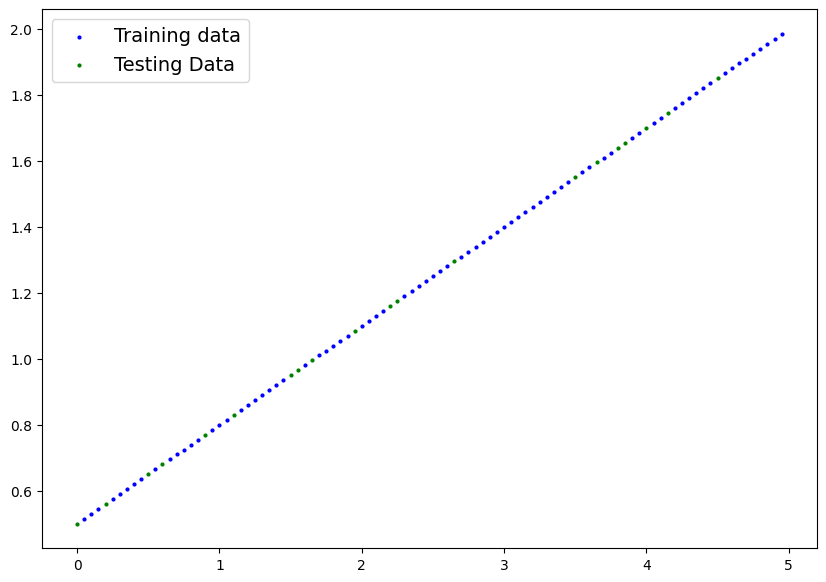

In [52]:
# Plot the data
plot_pred(X_train, y_train, X_test, y_test)

## 6.2 Build the model (Linear Regression Model)

In [85]:
# Create a linaer model by subclassing nn.Module
class LinearRegressionM(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model Parameters   (also known as linear transform, probing layer, fully connected layer, ...)
    # already comes with a weight and a bias -> printed a couple lines below to see the parameters for this model
    self.linear_layer = nn.Linear(in_features=1,    # X
                                  out_features=1)   # y

    # get torch.Tensor as input and return torch.Tensor
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


# Set a manual seed
torch.manual_seed(42)
model_1 = LinearRegressionM()
model_1, model_1.state_dict()


(LinearRegressionM(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [86]:
# Check the model device at our disposal
next(model_1.parameters()).device

device(type='cpu')

In [87]:
model_1.to(device)
next(model_1.parameters()).device         # now on the GPU (CUDA)

device(type='cuda', index=0)

### 6.3 Training the model

For training we need:
* Loss function to see how wrong we are
* Optimizer is to configure and optimize the variables in our model (which start random) to be fine tuned to our dataset to lower the loss.
* Training loop
* Testing loop

In [88]:
# Setup loss function

loss_fn = nn.L1Loss()   # same as MAE

# setup our optmizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [89]:
# Training loop (set to a 'fixed' randomness)
torch.manual_seed(42)

epochs = 200       # Make it iterate through 200

# some stuff to keep track of model metrics
# Lists that could help us keep the track of training the model and its metrics
epoch_count = []
loss_values = []
test_loss_values = []

# Since we changed the model to work on CUDA, we must change the tensors as they are allocated to work on the CPU to the GPU or CUDA
X_train = X_train.to(device)
X_test  = X_test.to(device)

y_train = y_train.to(device)
y_test  = y_test.to(device)

for epoch in range(epochs):
  model_1.train() # Set model to train

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing (Create a habit to call `model_1.eval()` when you are testing model) as well turning off gradient
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's  going on


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} || Loss: {loss} || Test Loss: {test_loss}")
    # keeping track of what is going on with our model (metrics)
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)





Epoch: 0 || Loss: 1.5087743997573853 || Test Loss: 1.2971467971801758
Epoch: 10 || Loss: 0.7648836374282837 || Test Loss: 0.6325529217720032
Epoch: 20 || Loss: 0.0550544373691082 || Test Loss: 0.05735711008310318
Epoch: 30 || Loss: 0.03836137801408768 || Test Loss: 0.041044946759939194
Epoch: 40 || Loss: 0.0297172199934721 || Test Loss: 0.050009965896606445
Epoch: 50 || Loss: 0.025295186787843704 || Test Loss: 0.04583650454878807
Epoch: 60 || Loss: 0.03715507313609123 || Test Loss: 0.033264487981796265
Epoch: 70 || Loss: 0.026412123814225197 || Test Loss: 0.04197565093636513
Epoch: 80 || Loss: 0.023372767493128777 || Test Loss: 0.044698577374219894
Epoch: 90 || Loss: 0.022809281945228577 || Test Loss: 0.04520425945520401
Epoch: 100 || Loss: 0.022809281945228577 || Test Loss: 0.04520425945520401
Epoch: 110 || Loss: 0.022809281945228577 || Test Loss: 0.04520425945520401
Epoch: 120 || Loss: 0.022809281945228577 || Test Loss: 0.04520425945520401
Epoch: 130 || Loss: 0.022809281945228577 || 

In [90]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3047]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5110], device='cuda:0'))])

In [91]:
weight, bias

(0.3, 0.5)

### 6.4 Making and evaluating predictions

In [93]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds



tensor([[1.7753],
        [1.3183],
        [1.5773],
        [1.1965],
        [1.1812],
        [1.1051],
        [0.8461],
        [1.7296],
        [0.6633],
        [0.5110],
        [0.7852],
        [0.9680],
        [1.6230],
        [1.0137],
        [1.8819],
        [0.5719],
        [1.6687],
        [1.6839],
        [0.6938],
        [0.9832]], device='cuda:0')

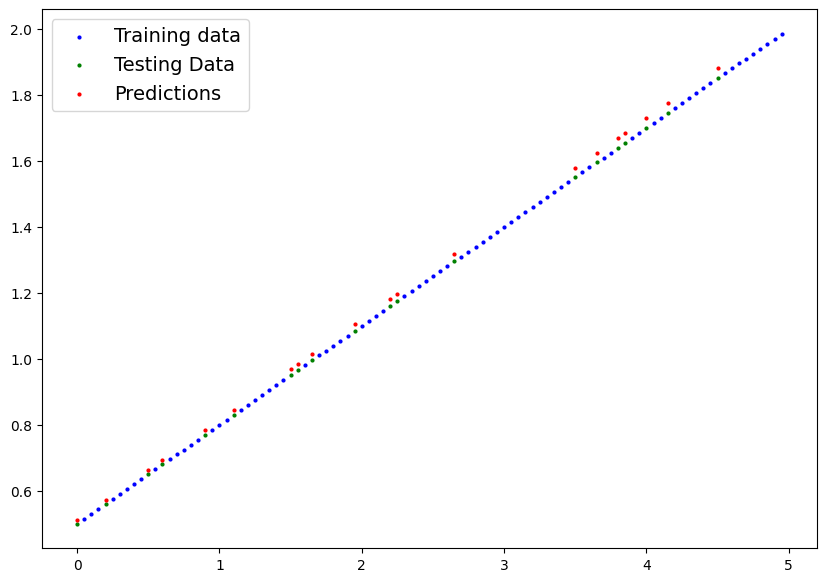

In [95]:
# Check out the model predictions by plotting it

# Note that matplotlib works with numpy array, not tensor, thus we add the .cpu()
plot_pred(train_data=X_train.cpu(), train_labels=y_train.cpu(), test_data=X_test.cpu(), test_labels=y_test.cpu(), predictions=y_preds.cpu())

### Saving & Loading the model

In [97]:
from pathlib import Path

# 1. Create the directory for model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'LR_model.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Save the model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),          # Saving the parameters
           f=MODEL_SAVE_PATH)                 # Saving on directory MODEL_SAVE_PATH


Save the model to models/LR_model.pt


In [99]:
# Load the model (first create a new instance)
loaded_model_1 = LinearRegressionM()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionM(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [100]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [101]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3047]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5110], device='cuda:0'))])

In [102]:
# Evaluate the LOADED model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')